In [88]:
import os
import re
import csv
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import subprocess
from subprocess import check_output
import matplotlib.pyplot as plt
import pandas as pd
import time
import hashlib
import numpy as np

def extract_values(input_list):
    numeric_values = []
    converted_values = []

    for value_with_unit in input_list:
        match = re.match(r'(\d+\.\d+|\d+)(\w+)/s', value_with_unit)
        if match:
            numeric_value = float(match.group(1))
            unit = match.group(2)

            if unit == 'kB':
                numeric_value /= 1000  # Convert KiB to MiB

            numeric_values.append(numeric_value)
            converted_values.append(f'{numeric_value}MB/s')

    return numeric_values

def condition_generator(bs, qd, cs, pt, dt):
    conditions_lsvd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randread') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_rw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randwrite') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'read') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'write') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    return conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw

df = pd.read_csv("single_fio.csv")

In [89]:
lsvd_240gb_hdd_rr=[]
lsvd_240gb_ssd_rr=[]
rbd_hdd_rr=[]
rbd_ssd_rr=[]

lsvd_240gb_hdd_rw=[]
lsvd_240gb_ssd_rw=[]
rbd_hdd_rw=[]
rbd_ssd_rw=[]

lsvd_240gb_hdd_sr=[]
lsvd_240gb_ssd_sr=[]
rbd_hdd_sr=[]
rbd_ssd_sr=[]

lsvd_240gb_hdd_sw=[]
lsvd_240gb_ssd_sw=[]
rbd_hdd_sw=[]
rbd_ssd_sw=[]

lsvd_240gb_hdd_sw=[]
lsvd_240gb_ssd_sw=[]
rbd_hdd_sw=[]
rbd_ssd_sw=[]


queueList= [1, 16, 32, 64, 80, 96, 112, 128, 160, 192, 224, 256, 320, 384, 448, 512]

In [90]:


for value in queueList:

    ## List Generator for Large Cache Data LSVD ##
    
    bs='4ki'
    qd=value
    cs='240gb'
    pt='ssd'
    dt='lsvd'
    
    conditions_240gb_lsvd_ssd_rr, conditions_240gb_lsvd_ssd_rw, conditions_240gb_lsvd_ssd_sr, conditions_240gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
    
    pt ='hdd'
    
    conditions_240gb_lsvd_hdd_rr, conditions_240gb_lsvd_hdd_rw, conditions_240gb_lsvd_hdd_sr, conditions_240gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)
    
    
    bw_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
    bw_240gb_lsvd_ssd_rr=bw_240gb_lsvd_ssd_rr['bw_mb'].iloc[0]
    lsvd_240gb_ssd_rr.append(bw_240gb_lsvd_ssd_rr)
    lsvd_240gb_ssd_rr1=extract_values(lsvd_240gb_ssd_rr)
    # print(bw_240gb_lsvd_ssd_rr)
    
    bw_240gb_lsvd_ssd_rw=df[conditions_240gb_lsvd_ssd_rw]
    bw_240gb_lsvd_ssd_rw=bw_240gb_lsvd_ssd_rw['bw_mb'].iloc[0]
    lsvd_240gb_ssd_rw.append(bw_240gb_lsvd_ssd_rw)
    lsvd_240gb_ssd_rw1=extract_values(lsvd_240gb_ssd_rw)
    # print(bw_240gb_lsvd_ssd_rw)
    
    bw_240gb_lsvd_ssd_sr=df[conditions_240gb_lsvd_ssd_sr]
    bw_240gb_lsvd_ssd_sr=bw_240gb_lsvd_ssd_sr['bw_mb'].iloc[0]
    lsvd_240gb_ssd_sr.append(bw_240gb_lsvd_ssd_sr)
    lsvd_240gb_ssd_sr1=extract_values(lsvd_240gb_ssd_sr)
    #print(bw_240gb_lsvd_ssd_sr)
    
    bw_240gb_lsvd_ssd_sw=df[conditions_240gb_lsvd_ssd_sw]
    bw_240gb_lsvd_ssd_sw=bw_240gb_lsvd_ssd_sw['bw_mb'].iloc[0]
    lsvd_240gb_ssd_sw.append(bw_240gb_lsvd_ssd_sw)
    lsvd_240gb_ssd_sw1=extract_values(lsvd_240gb_ssd_sw)
    #print(bw_240gb_lsvd_ssd_sw)
    
    
    
    bw_240gb_lsvd_hdd_rr=df[conditions_240gb_lsvd_hdd_rr]
    bw_240gb_lsvd_hdd_rr=bw_240gb_lsvd_hdd_rr['bw_mb'].iloc[0]
    lsvd_240gb_hdd_rr.append(bw_240gb_lsvd_hdd_rr)
    lsvd_240gb_hdd_rr1=extract_values(lsvd_240gb_hdd_rr)
    # print(bw_240gb_lsvd_hdd_rr)
    
    bw_240gb_lsvd_hdd_rw=df[conditions_240gb_lsvd_hdd_rw]
    bw_240gb_lsvd_hdd_rw=bw_240gb_lsvd_hdd_rw['bw_mb'].iloc[0]
    lsvd_240gb_hdd_rw.append(bw_240gb_lsvd_hdd_rw)
    lsvd_240gb_hdd_rw1=extract_values(lsvd_240gb_hdd_rw)
    # print(bw_240gb_lsvd_hdd_rw)
    
    bw_240gb_lsvd_hdd_sr=df[conditions_240gb_lsvd_hdd_sr]
    bw_240gb_lsvd_hdd_sr=bw_240gb_lsvd_hdd_sr['bw_mb'].iloc[0]
    lsvd_240gb_hdd_sr.append(bw_240gb_lsvd_hdd_sr)
    lsvd_240gb_hdd_sr1=extract_values(lsvd_240gb_hdd_sr)
    #print(bw_240gb_lsvd_hdd_sr)
    
    bw_240gb_lsvd_hdd_sw=df[conditions_240gb_lsvd_hdd_sw]
    bw_240gb_lsvd_hdd_sw=bw_240gb_lsvd_hdd_sw['bw_mb'].iloc[0]
    lsvd_240gb_hdd_sw.append(bw_240gb_lsvd_hdd_sw)
    lsvd_240gb_hdd_sw1=extract_values(lsvd_240gb_hdd_sw)
    #print(bw_240gb_lsvd_hdd_sw)



In [91]:
for value in queueList:

    ## List Generator for RBD ##
    
    bs='4ki'
    qd=value
    cs='none'
    pt='ssd'
    dt='rbd'
    
    conditions_rbd_ssd_rr, conditions_rbd_ssd_rw, conditions_rbd_ssd_sr, conditions_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
    
    pt ='hdd'
    
    conditions_rbd_hdd_rr, conditions_rbd_hdd_rw, conditions_rbd_hdd_sr, conditions_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)
    
    
    bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
    bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw_mb'].iloc[0]
    rbd_ssd_rr.append(bw_rbd_ssd_rr)
    rbd_ssd_rr1= extract_values(rbd_ssd_rr)
    # print(bw_rbd_ssd_rr)
    
    bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
    bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw_mb'].iloc[0]
    rbd_ssd_rw.append(bw_rbd_ssd_rw)
    rbd_ssd_rw1= extract_values(rbd_ssd_rw)
    # print(bw_rbd_ssd_rw)
    
    bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
    bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw_mb'].iloc[0]
    rbd_ssd_sr.append(bw_rbd_ssd_sr)
    rbd_ssd_sr1= extract_values(rbd_ssd_sr)
    #print(bw_rbd_ssd_sr)
    
    bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
    bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw_mb'].iloc[0]
    rbd_ssd_sw.append(bw_rbd_ssd_sw)
    rbd_ssd_sw1= extract_values(rbd_ssd_sw)
    # print(rbd_ssd_sw1)
    
    
    
    bw_rbd_hdd_rr=df[conditions_rbd_hdd_rr]
    bw_rbd_hdd_rr=bw_rbd_hdd_rr['bw_mb'].iloc[0]
    rbd_hdd_rr.append(bw_rbd_hdd_rr)
    rbd_hdd_rr1= extract_values(rbd_hdd_rr)
    # print(bw_rbd_hdd_rr)
    
    bw_rbd_hdd_rw=df[conditions_rbd_hdd_rw]
    bw_rbd_hdd_rw=bw_rbd_hdd_rw['bw_mb'].iloc[0]
    rbd_hdd_rw.append(bw_rbd_hdd_rw)
    rbd_hdd_rw1= extract_values(rbd_hdd_rw)
    # print(bw_rbd_hdd_rw)
    
    bw_rbd_hdd_sr=df[conditions_rbd_hdd_sr]
    bw_rbd_hdd_sr=bw_rbd_hdd_sr['bw_mb'].iloc[0]
    rbd_hdd_sr.append(bw_rbd_hdd_sr)
    rbd_hdd_sr1= extract_values(rbd_hdd_sr)
    #print(bw_rbd_hdd_sr)
    
    bw_rbd_hdd_sw=df[conditions_rbd_hdd_sw]
    bw_rbd_hdd_sw=bw_rbd_hdd_sw['bw_mb'].iloc[0]
    rbd_hdd_sw.append(bw_rbd_hdd_sw)
    rbd_hdd_sw1= extract_values(rbd_hdd_sw)
    #print(bw_240gb_lsvd_hdd_sw)

In [92]:
print(rbd_hdd_sw)
print(rbd_hdd_sw1)

['167kB/s', '1406kB/s', '1910kB/s', '3874kB/s', '6143kB/s', '6810kB/s', '7179kB/s', '7061kB/s', '7236kB/s', '7221kB/s', '7153kB/s', '7366kB/s', '7278kB/s', '7119kB/s', '7193kB/s', '6942kB/s']
[0.167, 1.406, 1.91, 3.874, 6.143, 6.81, 7.179, 7.061, 7.236, 7.221, 7.153, 7.366, 7.278, 7.119, 7.193, 6.942]


In [93]:
print(lsvd_240gb_hdd_sw1)
print(lsvd_240gb_hdd_sw)

[28.4, 153.0, 180.0, 188.0, 186.0, 187.0, 192.0, 184.0, 182.0, 187.0, 195.0, 195.0, 194.0, 172.0, 200.0, 193.0]
['28.4MB/s', '153MB/s', '180MB/s', '188MB/s', '186MB/s', '187MB/s', '192MB/s', '184MB/s', '182MB/s', '187MB/s', '195MB/s', '195MB/s', '194MB/s', '172MB/s', '200MB/s', '193MB/s']


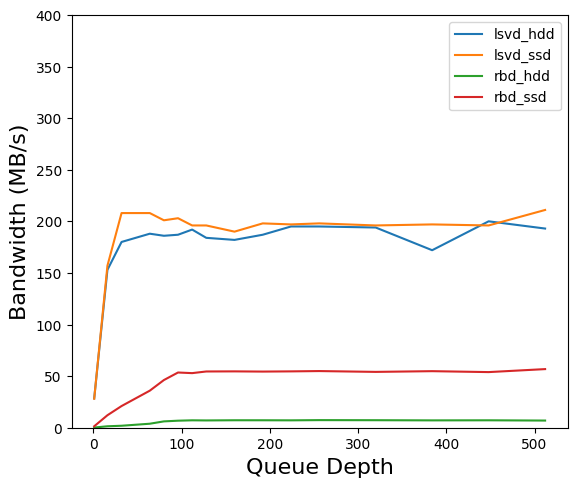

In [94]:
plt.plot(queueList, lsvd_240gb_hdd_sw1, label = "lsvd_hdd" )
plt.plot(queueList, lsvd_240gb_ssd_sw1, label = "lsvd_ssd" )
plt.plot(queueList, rbd_hdd_sw1, label = "rbd_hdd" )
plt.plot(queueList, rbd_ssd_sw1, label = "rbd_ssd" )
plt.xlabel('Queue Depth', fontweight ='normal', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='normal', fontsize = 16)
# plt.xticks(queueList, queueList)
description = f"Bandwidth for sequential write with varying queue depth. 80GB volume, 240GB cache, 4K blocksize"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.legend() 
plt.subplots_adjust(bottom=0.02) 
plt.ylim(0, 400)
plt.savefig('request_bw_qd_sw.png')
plt.show()



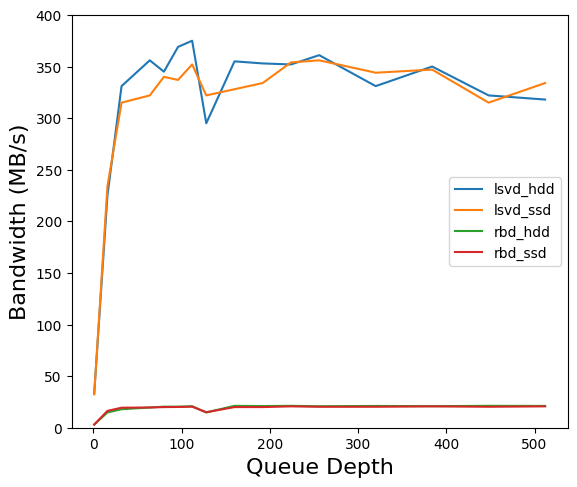

In [95]:
plt.plot(queueList, lsvd_240gb_hdd_sr1, label = "lsvd_hdd" )
plt.plot(queueList, lsvd_240gb_ssd_sr1, label = "lsvd_ssd" )
plt.plot(queueList, rbd_hdd_sr1, label = "rbd_hdd" )
plt.plot(queueList, rbd_ssd_sr1, label = "rbd_ssd" )
plt.xlabel('Queue Depth', fontweight ='normal', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='normal', fontsize = 16)
# plt.xticks(queueList, queueList)
description = f"Bandwidth for random read with varying queue depth. 80GB volume, 240GB cache, 4K blocksize"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.legend() 
plt.ylim(0, 400)
plt.savefig('request_bw_qd_sr.png')
plt.subplots_adjust(bottom=0.02) 
plt.show()

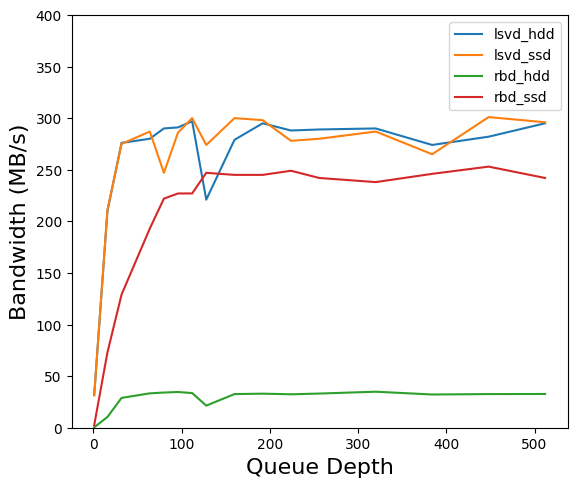

In [96]:
plt.plot(queueList, lsvd_240gb_hdd_rr1, label = "lsvd_hdd" )
plt.plot(queueList, lsvd_240gb_ssd_rr1, label = "lsvd_ssd" )
plt.plot(queueList, rbd_hdd_rr1, label = "rbd_hdd" )
plt.plot(queueList, rbd_ssd_rr1, label = "rbd_ssd" )
plt.xlabel('Queue Depth', fontweight ='normal', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='normal', fontsize = 16)
# plt.xticks(queueList, queueList)
description = f"Bandwidth for random read with varying queue depth. 80GB volume, 240GB cache, 4K blocksize"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.legend() 
plt.savefig('request_bw_qd_rr.png')
plt.ylim(0, 400)
plt.subplots_adjust(bottom=0.02) 
plt.show()



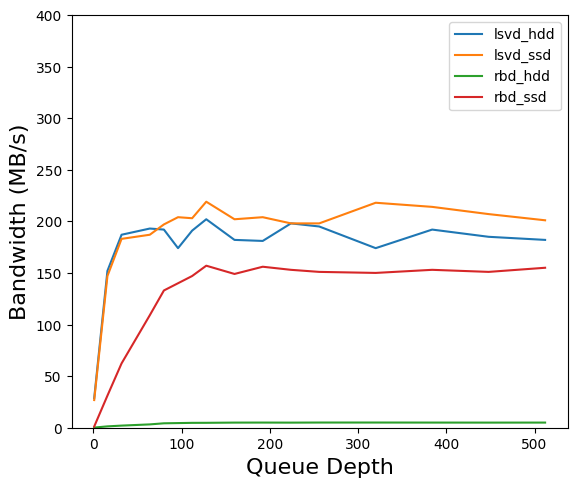

In [97]:
plt.plot(queueList, lsvd_240gb_hdd_rw1, label = "lsvd_hdd" )
plt.plot(queueList, lsvd_240gb_ssd_rw1, label = "lsvd_ssd" )
plt.plot(queueList, rbd_hdd_rw1, label = "rbd_hdd" )
plt.plot(queueList, rbd_ssd_rw1, label = "rbd_ssd" )
plt.xlabel('Queue Depth', fontweight ='normal', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='normal', fontsize = 16)
# plt.xticks(queueList, queueList)
description = f"Bandwidth for random read with varying queue depth. 80GB volume, 240GB cache, 4K blocksize"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.legend() 
plt.ylim(0, 400)
plt.savefig('request_bw_qd_rw.png')
plt.subplots_adjust(bottom=0.02) 
plt.show()